In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from scipy.ndimage import gaussian_filter  # For Gaussian blur


**Data collection and Preprocessing Data**

In [ ]:


# CIFAR-10 dataset
(train_images, _), (test_images, _) = cifar10.load_data()

#  Normalize the images to the range [0, 1]
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# show shape of images to verify
print(f"Training images shape: {train_images.shape}")
print(f"Test images shape: {test_images.shape}")


Training images shape: (50000, 32, 32, 3)
Test images shape: (10000, 32, 32, 3)


**Data Preprocessing and EDA**

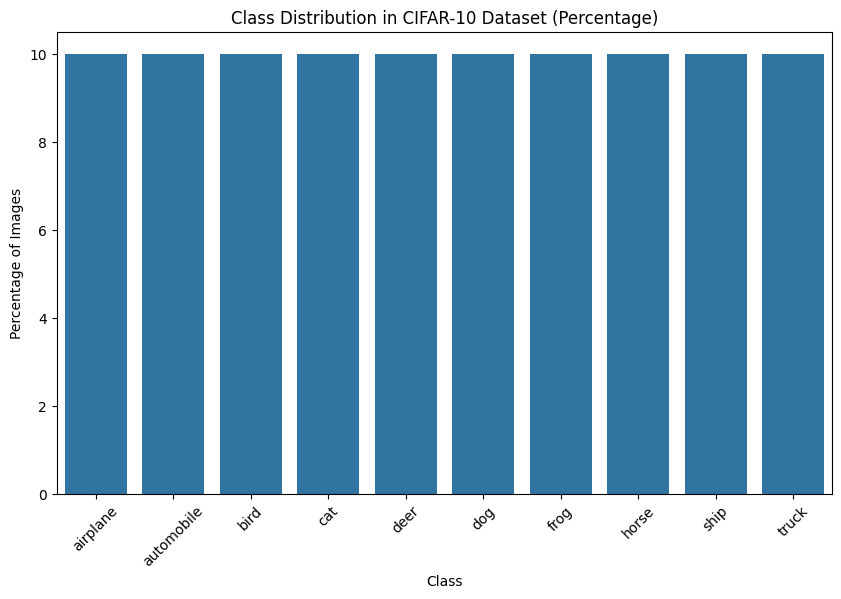

Total number of pixel values: 153600000
Minimum pixel value: 0
Maximum pixel value: 255
Mean pixel value: 120.7076
Standard deviation of pixel values: 64.1501

Red Channel:
  Total values: 51200000
  Min value: 0
  Max value: 255
  Mean: 125.3069
  Standard deviation: 62.9932

Green Channel:
  Total values: 51200000
  Min value: 0
  Max value: 255
  Mean: 122.9504
  Standard deviation: 62.0887

Blue Channel:
  Total values: 51200000
  Min value: 0
  Max value: 255
  Mean: 113.8654
  Standard deviation: 66.7049


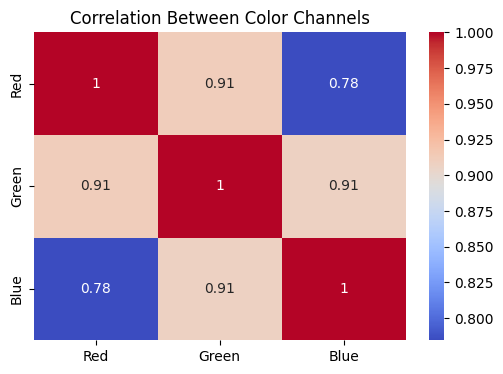

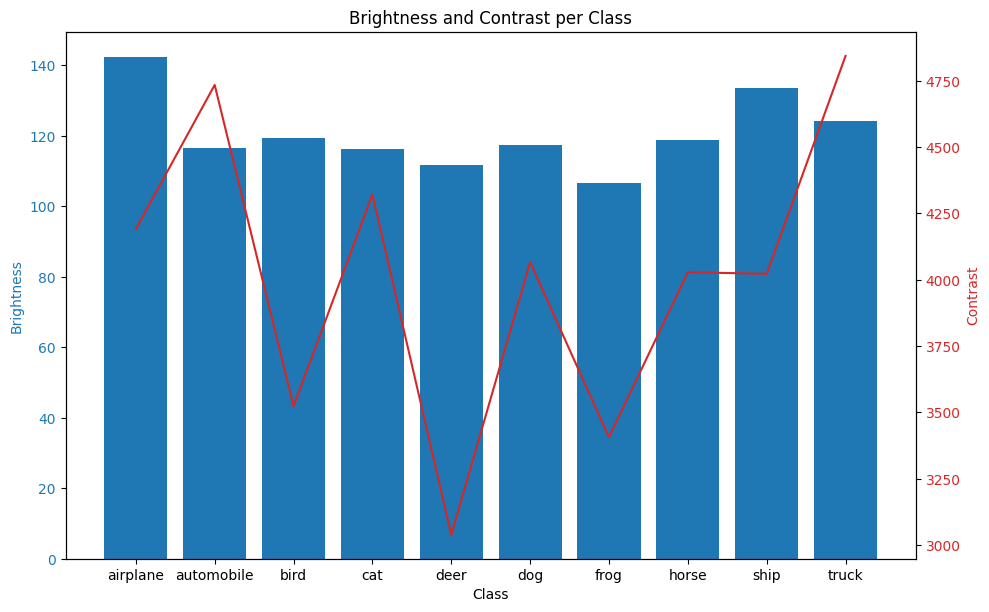

Number of images after filtering by red channel mean > 0.6: 50000


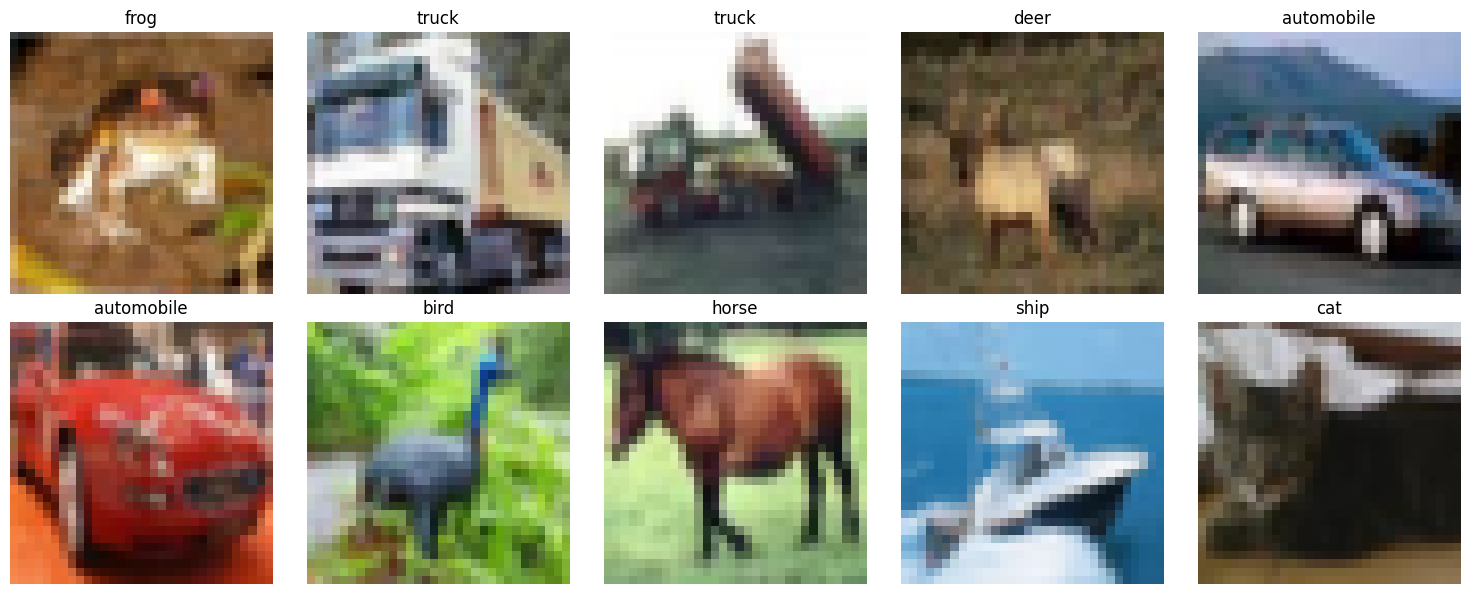

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import cifar10

# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# CIFAR-10 Class Names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


unique, counts = np.unique(train_labels, return_counts=True)
class_distribution = dict(zip(class_names, counts))

plt.figure(figsize=(10, 6))
sns.barplot(x=list(class_distribution.keys()), y=[(count / len(train_labels)) * 100 for count in counts])
plt.title('Class Distribution in CIFAR-10 Dataset (Percentage)')
plt.ylabel('Percentage of Images')
plt.xlabel('Class')
plt.xticks(rotation=45)
plt.show()


def print_statistical_summary(images):
    total_values = np.prod(images.shape)
    min_value = np.min(images)
    max_value = np.max(images)
    mean_value = np.mean(images)
    std_value = np.std(images)

    print(f"Total number of pixel values: {total_values}")
    print(f"Minimum pixel value: {min_value}")
    print(f"Maximum pixel value: {max_value}")
    print(f"Mean pixel value: {mean_value:.4f}")
    print(f"Standard deviation of pixel values: {std_value:.4f}")


    for i, color in enumerate(['Red', 'Green', 'Blue']):
        channel_data = images[:, :, :, i].flatten()
        print(f"\n{color} Channel:")
        print(f"  Total values: {channel_data.size}")
        print(f"  Min value: {np.min(channel_data)}")
        print(f"  Max value: {np.max(channel_data)}")
        print(f"  Mean: {np.mean(channel_data):.4f}")
        print(f"  Standard deviation: {np.std(channel_data):.4f}")

# Print statistical summary
print_statistical_summary(train_images)

# 3. Correlation Matrix for Pixel Intensities Across Channels
red_channel = train_images[:, :, :, 0].flatten()
green_channel = train_images[:, :, :, 1].flatten()
blue_channel = train_images[:, :, :, 2].flatten()

correlation_matrix = np.corrcoef([red_channel, green_channel, blue_channel])

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', xticklabels=['Red', 'Green', 'Blue'], yticklabels=['Red', 'Green', 'Blue'])
plt.title("Correlation Between Color Channels")
plt.show()

# 4. Brightness and Contrast: Calculate image brightness and contrast for each class
brightness = []
contrast = []

for label in np.unique(train_labels):
    class_images = train_images[train_labels.flatten() == label]
    class_brightness = np.mean(class_images)
    class_contrast = np.var(class_images)
    brightness.append(class_brightness)
    contrast.append(class_contrast)

# Plot Brightness and Contrast per Class
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.set_xlabel('Class')
ax1.set_ylabel('Brightness', color=color)
ax1.bar(class_names, brightness, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Contrast', color=color)
ax2.plot(class_names, contrast, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Brightness and Contrast per Class')
plt.xticks(rotation=45)
plt.show()

# 5. Data Filtering
def filter_images_by_channel_mean(images, labels, channel_index, threshold):
    filtered_images = []
    filtered_labels = []
    for i, img in enumerate(images):
        if np.mean(img[:, :, channel_index]) > threshold:
            filtered_images.append(img)
            filtered_labels.append(labels[i])
    return np.array(filtered_images), np.array(filtered_labels)

# Filter images with a red channel mean > 0.6
filtered_images, filtered_labels = filter_images_by_channel_mean(train_images, train_labels, channel_index=0, threshold=0.6)

print(f"Number of images after filtering by red channel mean > 0.6: {filtered_images.shape[0]}")

# 6. Display filtered images and their labels
def plot_filtered_images(images, labels, class_names, n_samples=10):
    plt.figure(figsize=(15, 6))
    for i in range(n_samples):
        plt.subplot(2, n_samples//2, i+1)
        plt.imshow(images[i])
        plt.title(class_names[labels[i][0]])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Plot some of the filtered images
plot_filtered_images(filtered_images, filtered_labels, class_names)




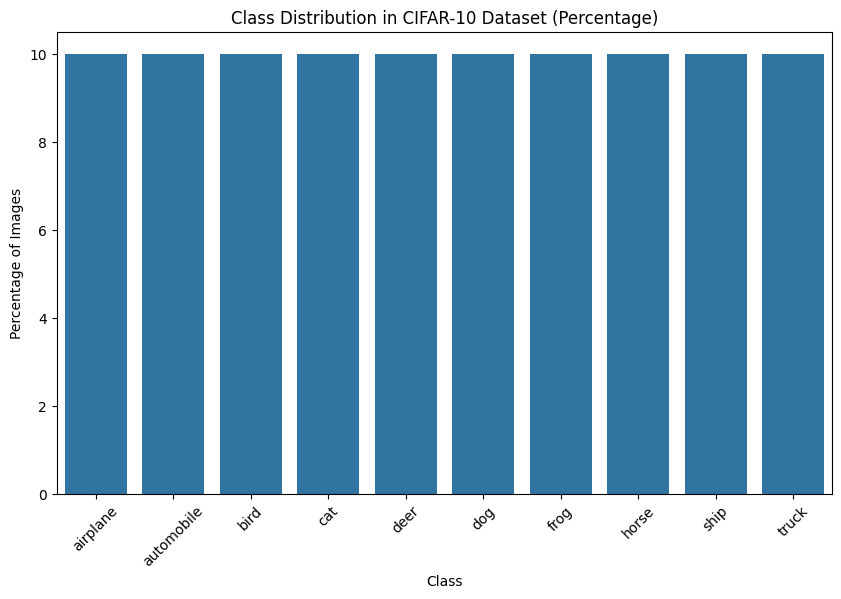

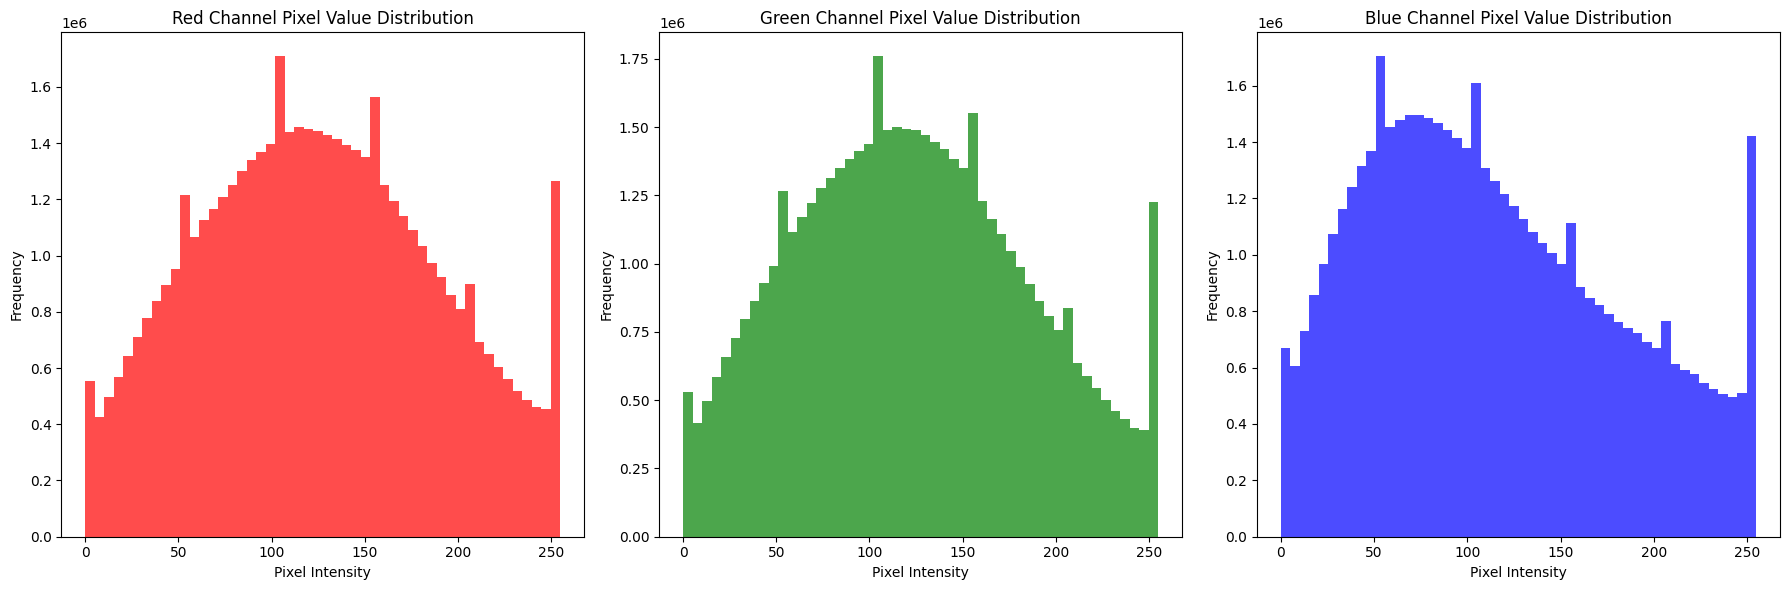

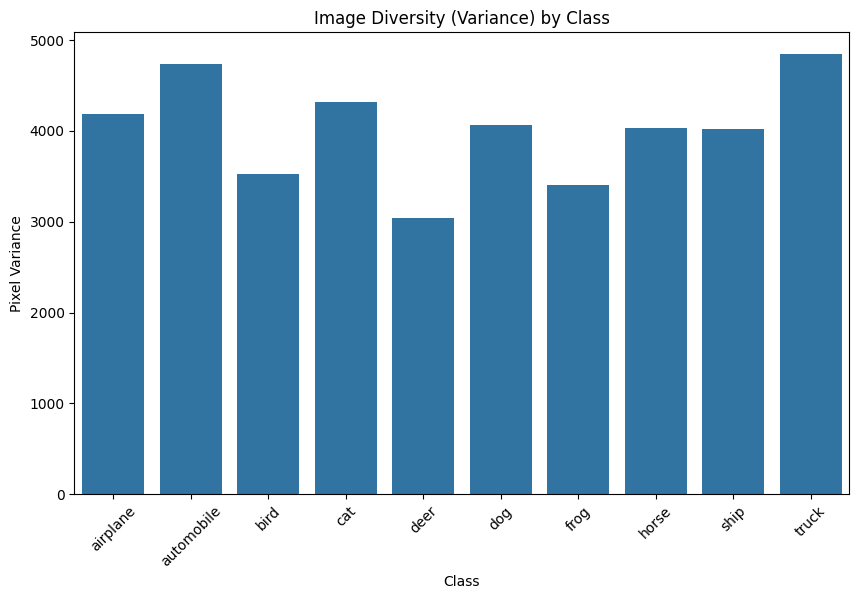

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


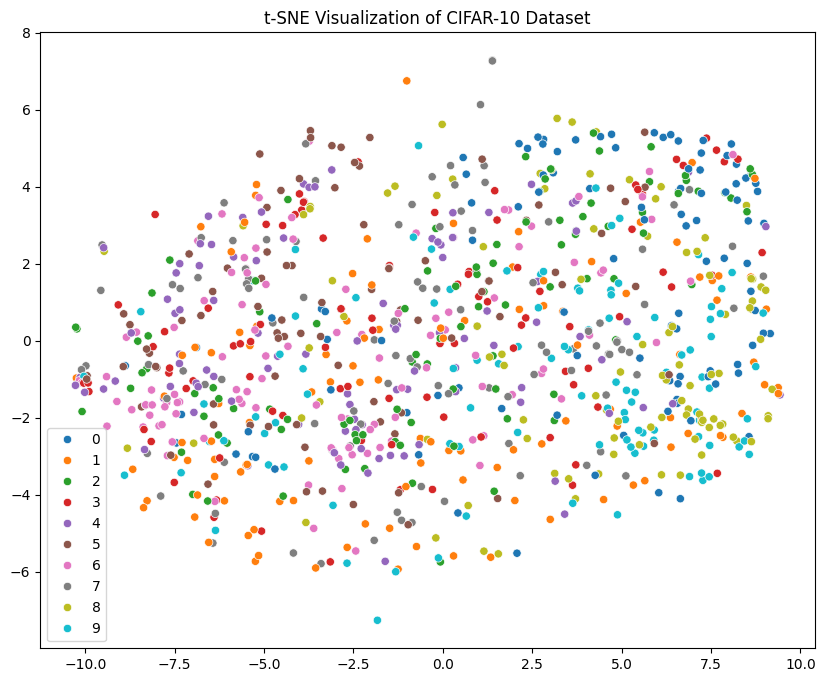

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

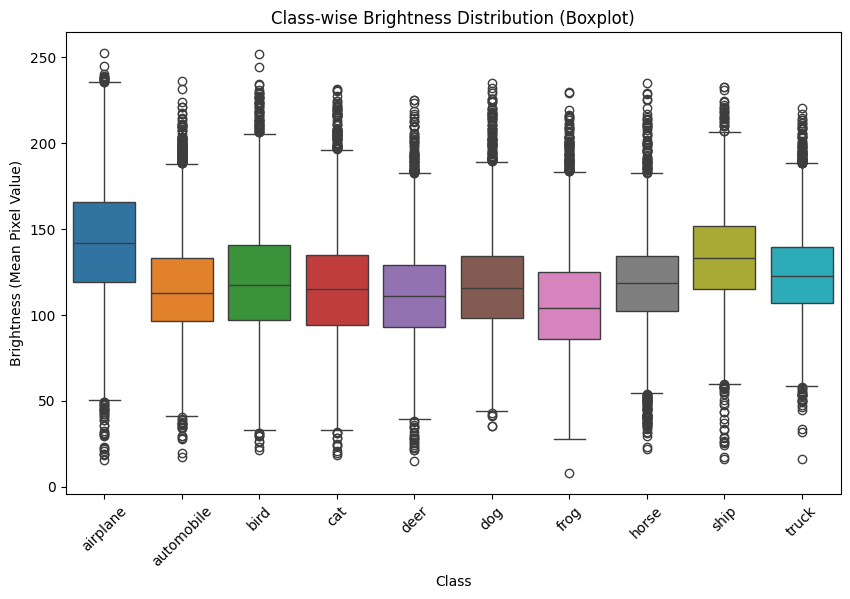

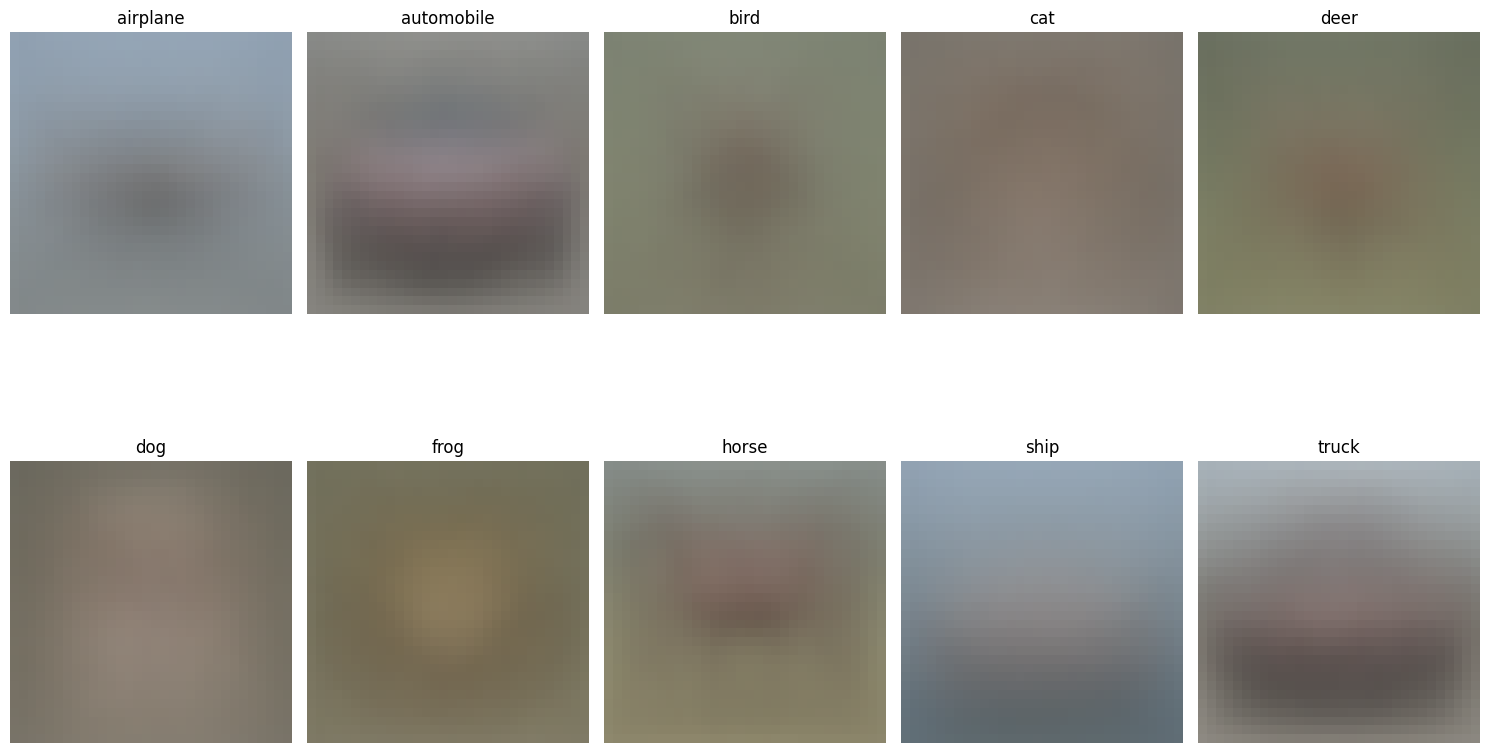

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from tensorflow.keras.datasets import cifar10

# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# CIFAR-10 Class Names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# 1. Class Distribution with Percentage
unique, counts = np.unique(train_labels, return_counts=True)
class_distribution = dict(zip(class_names, counts))

plt.figure(figsize=(10, 6))
sns.barplot(x=list(class_distribution.keys()), y=[(count / len(train_labels)) * 100 for count in counts])
plt.title('Class Distribution in CIFAR-10 Dataset (Percentage)')
plt.ylabel('Percentage of Images')
plt.xlabel('Class')
plt.xticks(rotation=45)
plt.show()

#  RGB Channel Histograms for Pixel Value Distributions
def plot_rgb_histograms(images):
    plt.figure(figsize=(18, 6))

    for i, color in enumerate(['Red', 'Green', 'Blue']):
        channel_data = images[:, :, :, i].flatten()

        plt.subplot(1, 3, i+1)
        plt.hist(channel_data, bins=50, color=color.lower(), alpha=0.7)
        plt.title(f"{color} Channel Pixel Value Distribution")
        plt.xlabel('Pixel Intensity')
        plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()


plot_rgb_histograms(train_images)



# Image Diversity (Variance) for Each Class
def calculate_image_variance(images, labels):
    variances = []
    for label in np.unique(labels):
        class_images = images[labels.flatten() == label]
        variances.append(np.var(class_images))
    return variances


variances = calculate_image_variance(train_images, train_labels)

plt.figure(figsize=(10, 6))
sns.barplot(x=class_names, y=variances)
plt.title('Image Diversity (Variance) by Class')
plt.ylabel('Pixel Variance')
plt.xlabel('Class')
plt.xticks(rotation=45)
plt.show()



# t-SNE Visualization for Dimensionality Reduction
def plot_tsne(images, labels, num_samples=1000):
    flat_images = images.reshape((images.shape[0], -1))
    tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=300)
    reduced_data = tsne.fit_transform(flat_images[:num_samples])

    plt.figure(figsize=(10, 8))
    sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=labels[:num_samples].flatten(), palette="tab10", legend='full')
    plt.title('t-SNE Visualization of CIFAR-10 Dataset')
    plt.show()


plot_tsne(train_images, train_labels)



# Class-wise Average Brightness Distribution (Boxplot)
def plot_brightness_distribution(images, labels):
    brightness_values = []
    for label in np.unique(labels):
        class_images = images[labels.flatten() == label]
        class_brightness = np.mean(class_images, axis=(1, 2, 3))
        brightness_values.append(class_brightness)

    plt.figure(figsize=(10, 6))
    sns.boxplot(data=brightness_values)
    plt.title('Class-wise Brightness Distribution (Boxplot)')
    plt.ylabel('Brightness (Mean Pixel Value)')
    plt.xlabel('Class')
    plt.xticks(ticks=np.arange(10), labels=class_names, rotation=45)
    plt.show()


plot_brightness_distribution(train_images, train_labels)


# Heatmap of Mean Image for Each Class
def plot_mean_image_per_class(images, labels, class_names):
    mean_images = []

    plt.figure(figsize=(15, 10))
    for i, class_name in enumerate(class_names):
        class_images = images[labels.flatten() == i]
        mean_image = np.mean(class_images, axis=0)
        mean_images.append(mean_image)

        ax = plt.subplot(2, 5, i + 1)
        plt.imshow(mean_image.astype(np.uint8))
        plt.title(class_name)
        plt.axis('off')

    plt.tight_layout()
    plt.show()


plot_mean_image_per_class(train_images, train_labels, class_names)




 **LSTM Autoencoder Implementation**

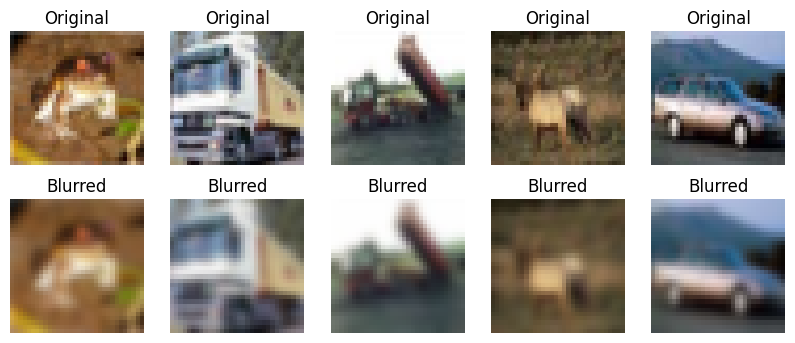

In [ ]:
#  Apply Gaussian blur
def apply_gaussian_blur(images, sigma=1.0):
    blurred_images = np.zeros_like(images)
    for i in range(images.shape[0]):
        for j in range(images.shape[3]):
            blurred_images[i, :, :, j] = gaussian_filter(images[i, :, :, j], sigma=sigma)
    return blurred_images

# Apply Gaussian blur to training and test images
blurred_train_images = apply_gaussian_blur(train_images, sigma=1.0)
blurred_test_images = apply_gaussian_blur(test_images, sigma=1.0)

# Show some original and blurred images for comparison
n = 5  # Number of images to display
plt.figure(figsize=(10, 4))
for i in range(n):
    # Display original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(train_images[i])
    plt.title("Original")
    plt.axis("off")

    # Display blurred image
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(blurred_train_images[i])
    plt.title("Blurred")
    plt.axis("off")
plt.show()


In [ ]:
# autoencoder
input_shape = (32, 32, 3)

# Encoder
encoder_input = layers.Input(shape=input_shape)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoder_input)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

# Define the autoencoder model
autoencoder = models.Model(encoder_input, decoded)


autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 4, 4, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d (UpSampling2D)         │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 64)            │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_1 (UpSampling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 16, 16, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_2 (UpSampling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 32, 32, 3)           │             867 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 333,955 (1.27 MB)

 Trainable params: 333,955 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#  Train the autoencoder
autoencoder.fit(blurred_train_images, train_images,
                epochs=10,
                batch_size=64,
                validation_data=(blurred_test_images, test_images))


reconstructed_images = autoencoder.predict(blurred_test_images)






Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 291s 372ms/step - loss: 0.5559 - val_loss: 0.5613
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 316s 364ms/step - loss: 0.5563 - val_loss: 0.5567
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 323s 366ms/step - loss: 0.5555 - val_loss: 0.5567
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 284s 364ms/step - loss: 0.5560 - val_loss: 0.5568
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 321s 362ms/step - loss: 0.5558 - val_loss: 0.5565
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 324s 365ms/step - loss: 0.5557 - val_loss: 0.5562
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 284s 363ms/step - loss: 0.5560 - val_loss: 0.5561
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 284s 363ms/step - loss: 0.5547 - val_loss: 0.5573
Epoch 9/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 324s 365ms/step - loss: 0.5554 - val_loss: 0.5562
Epoch 10/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 322s 365ms/step - loss: 0.5549 - val_loss: 0.5560
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 46ms/step


**CNN and RNN Models for Classification**

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 79ms/step - accuracy: 0.2442 - loss: 5.3932 - val_accuracy: 0.4456 - val_loss: 1.5546
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 77ms/step - accuracy: 0.4754 - loss: 1.4631 - val_accuracy: 0.4870 - val_loss: 1.4459
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 77ms/step - accuracy: 0.5529 - loss: 1.2572 - val_accuracy: 0.5407 - val_loss: 1.3156
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 84s 80ms/step - accuracy: 0.6158 - loss: 1.0894 - val_accuracy: 0.5873 - val_loss: 1.1894
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 79ms/step - accuracy: 0.6648 - loss: 0.9548 - val_accuracy: 0.5983 - val_loss: 1.1897
Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - accuracy: 0.1333 - loss: 2.3298 - val_accuracy: 0.1479 - val_loss: 2.2358
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.1585 - loss: 2.2356 - val_accuracy: 0.1791 - val_loss: 2.2148
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.1669 - loss: 2.2197 - val_accu

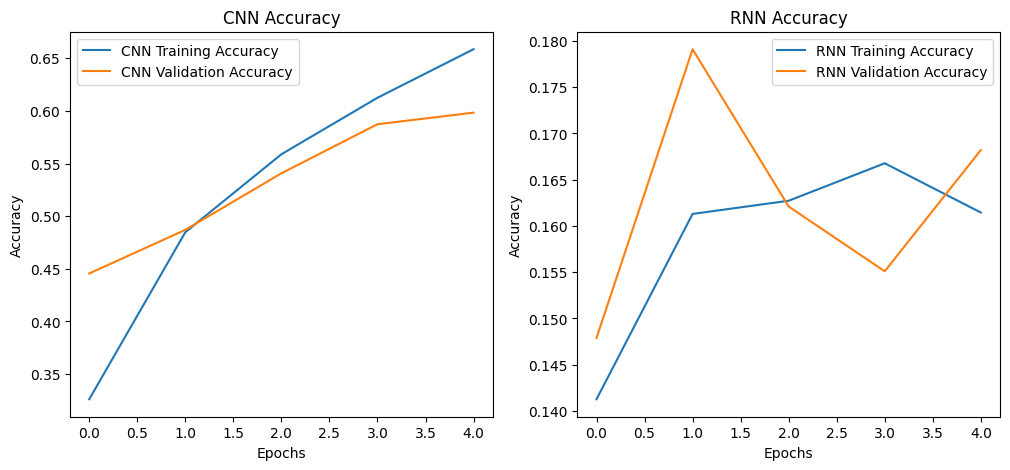

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
CNN Precision: 0.5981797137430139
CNN Recall: 0.5991
RNN Precision: 0.1333459263277358
RNN Recall: 0.165


In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, SimpleRNN
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt

# Load the CIFAR-10 dataset (including labels)
(train_images, y_train), (test_images, y_test) = cifar10.load_data()

# Reshape the data for CNN and RNN
x_train_cnn = train_images.reshape(-1, 32, 32, 3)
x_test_cnn = test_images.reshape(-1, 32, 32, 3)

x_train_rnn = train_images.reshape(-1, 32, 32*3)
x_test_rnn = test_images.reshape(-1, 32, 32*3)

# Split the data into train and validation sets for CNN and RNN
x_train_cnn, x_val_cnn, y_train_cnn, y_val_cnn = train_test_split(x_train_cnn, y_train, test_size=0.2, random_state=42)
x_train_rnn, x_val_rnn, y_train_rnn, y_val_rnn = train_test_split(x_train_rnn, y_train, test_size=0.2, random_state=42)

# CNN Model
cnn_model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_history = cnn_model.fit(x_train_cnn, y_train_cnn, validation_data=(x_val_cnn, y_val_cnn), epochs=5, batch_size=64)

# RNN Model
rnn_model = Sequential([
    SimpleRNN(128, input_shape=(32, 32*3)),
    Dense(10, activation='softmax')
])

rnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
rnn_history = rnn_model.fit(x_train_rnn, y_train_rnn, validation_data=(x_val_rnn, y_val_rnn), epochs=5, batch_size=64)

# Evaluate CNN and RNN models
cnn_test_loss, cnn_test_acc = cnn_model.evaluate(x_test_cnn, y_test)
rnn_test_loss, rnn_test_acc = rnn_model.evaluate(x_test_rnn, y_test)

print(f"CNN Test Accuracy: {cnn_test_acc}")
print(f"RNN Test Accuracy: {rnn_test_acc}")

# Plot the training history
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(cnn_history.history['accuracy'], label='CNN Training Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='CNN Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(rnn_history.history['accuracy'], label='RNN Training Accuracy')
plt.plot(rnn_history.history['val_accuracy'], label='RNN Validation Accuracy')
plt.title('RNN Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Evaluate precision and recall for CNN and RNN using the updated prediction method
from sklearn.metrics import precision_score, recall_score

# CNN Predictions and evaluation
y_pred_cnn = np.argmax(cnn_model.predict(x_test_cnn), axis=-1)  # Use predict() and argmax to get class labels
cnn_precision = precision_score(y_test, y_pred_cnn, average='weighted')
cnn_recall = recall_score(y_test, y_pred_cnn, average='weighted')

# RNN Predictions and evaluation
y_pred_rnn = np.argmax(rnn_model.predict(x_test_rnn), axis=-1)  # Use predict() and argmax to get class labels
rnn_precision = precision_score(y_test, y_pred_rnn, average='weighted')
rnn_recall = recall_score(y_test, y_pred_rnn, average='weighted')

# Print Precision and Recall for both models
print(f"CNN Precision: {cnn_precision}")
print(f"CNN Recall: {cnn_recall}")
print(f"RNN Precision: {rnn_precision}")
print(f"RNN Recall: {rnn_recall}")


**Model Comparison**

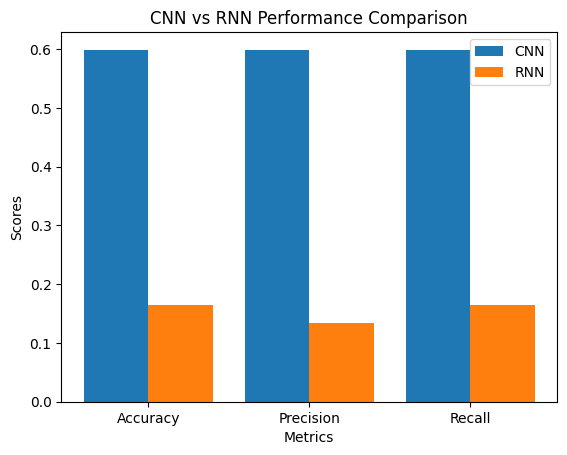

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Compare Accuracy, Precision, Recall between CNN and RNN
metrics = ['Accuracy', 'Precision', 'Recall']
cnn_scores = [cnn_test_acc, cnn_precision, cnn_recall]
rnn_scores = [rnn_test_acc, rnn_precision, rnn_recall]

X = np.arange(len(metrics))
plt.bar(X - 0.2, cnn_scores, 0.4, label='CNN')
plt.bar(X + 0.2, rnn_scores, 0.4, label='RNN')

plt.xticks(X, metrics)
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('CNN vs RNN Performance Comparison')
plt.legend()
plt.show()


**Confusion Metrics**

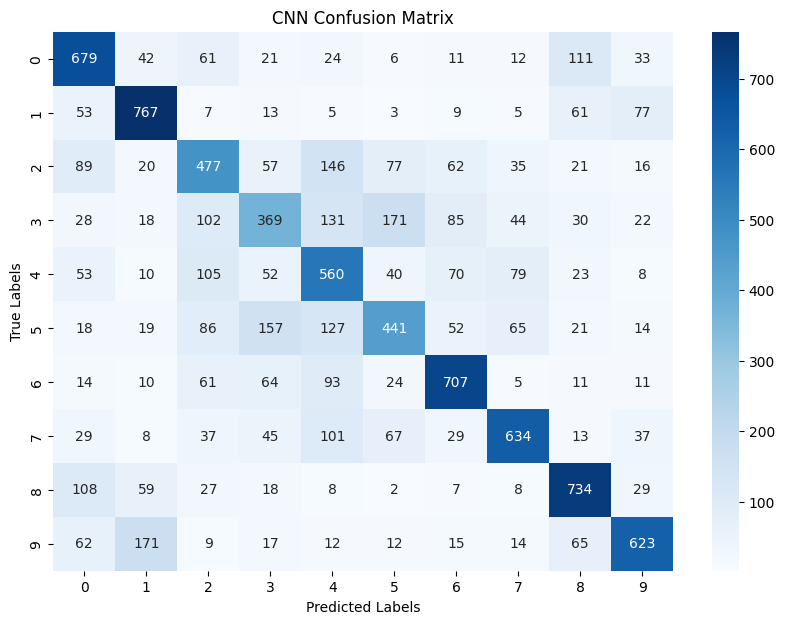

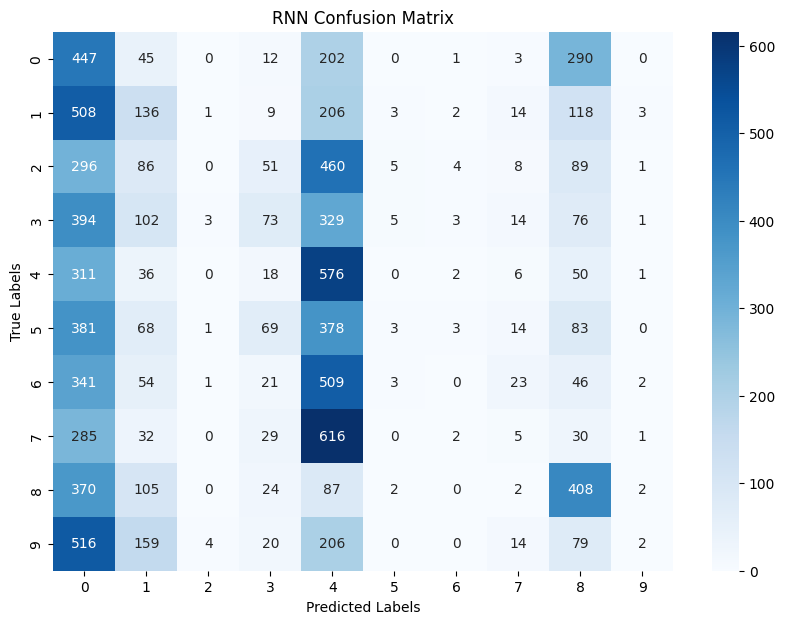

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# CNN Confusion Matrix
cnn_cm = confusion_matrix(y_test, y_pred_cnn)
plt.figure(figsize=(10, 7))
sns.heatmap(cnn_cm, annot=True, fmt="d", cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('CNN Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# RNN Confusion Matrix
rnn_cm = confusion_matrix(y_test, y_pred_rnn)
plt.figure(figsize=(10, 7))
sns.heatmap(rnn_cm, annot=True, fmt="d", cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('RNN Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


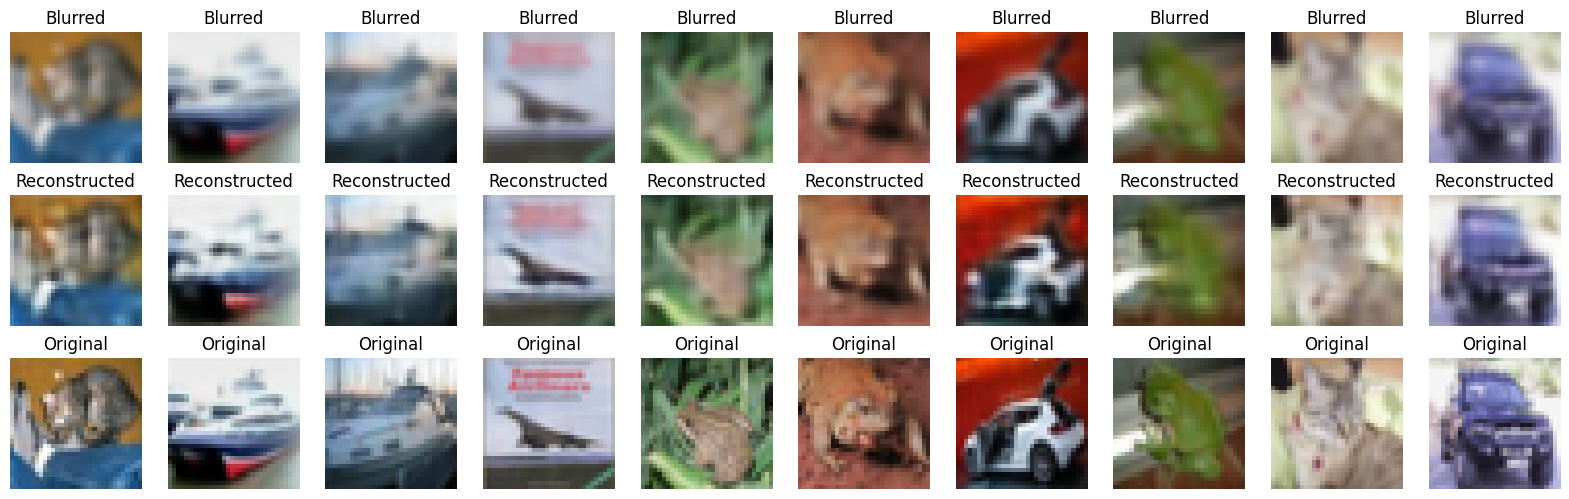

In [ ]:

import matplotlib.pyplot as plt

# Step 6: Visualize original, blurred, and reconstructed images
n = 10  # Number of images to display

# Use a small batch of blurred images for testing
test_samples = blurred_test_images[:n]  # Blurred images as input to the autoencoder
reconstructed_images = autoencoder.predict(test_samples)  # Reconstructed images from the autoencoder

# Plotting original, blurred, and reconstructed images
plt.figure(figsize=(20, 6))  # Adjust the figure size to fit the images better

for i in range(n):
    # Display blurred image
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(test_samples[i])
    plt.title("Blurred")
    plt.axis("off")

    # Display reconstructed image
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(reconstructed_images[i])
    plt.title("Reconstructed")
    plt.axis("off")

    # Display original image
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(test_images[i])  # Display original test images for comparison
    plt.title("Original")
    plt.axis("off")

plt.show()
